# Stage 0

## Problem Statement

PT X faces challenges in creating efficient data-driven recruitment due to lengthy and unstructured job descriptions, hindering objective candidate matching.

## Roles

Data Scientist Team at HR Tech NautixTech

## Goals
* Creating a more efficient recruitment process for hiring partners by increasing their satisfaction by 30%
* Increasing the candidate acceptance rate by 20% within 6 months.

## Objective
A machine learning system that helps candidates get jobs and companies find the best candidates by using sentence classification in job descriptions to identify responsibilities, skills, and qualifications, and match them based on skill scores and compatibility assessments.

## Business Metrics
* Hiring Partner Satisfaction Score (HPSS)

  Increase by 30%
  
  Measuring the satisfaction level of hiring partners with the recruitment process supported by the system, including time efficiency, the quality of recommended candidates, and the ease of use of the platform.
* Candidate Job Palcement Rate (CJPR)
  
  Increase by 20%
  
  Percentage of candidates successfully placed in job positions based on system recommendations compared to the total number of candidates using the platform.

# Stage 1

## Import Library

In [ ]:
# import library
!pip install wordcloud matplotlib

In [ ]:
! pip install statsmodels

In [ ]:
!pip install wordcloud

In [ ]:
# import library
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations and array manipulation
import matplotlib.pyplot as plt  # for creating static, animated, and interactive visualizations
import seaborn as sns  # for statistical data visualization
import scipy.stats as stats  # for statistical functions and tests
import statsmodels.api as sm  # for statistical modeling and econometrics
from wordcloud import WordCloud  # for generating word clouds from text data
from collections import Counter  # for counting hashable objects
import nltk  # for natural language processing tasks
import re  # for regular expression operations
from nltk.corpus import stopwords  # for accessing stopwords corpus
from nltk.tokenize import word_tokenize  # for tokenizing text into words
import plotly.graph_objects as go  # for creating interactive visualizations
from plotly.subplots import make_subplots  # for creating subplots in Plotly

## Read Dataset

In [ ]:
train_data = pd.read_csv(r'D:\Midah\Data Analyst\Rakamin Academy\FinPro\Dataset/train_data.csv')
test_data = pd.read_csv(r'D:\Midah\Data Analyst\Rakamin Academy\FinPro\Dataset/test_data.csv')
samplesubmission_raw = pd.read_csv(r'D:\Midah\Data Analyst\Rakamin Academy\FinPro\Dataset/sample_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Midah\\Data Analyst\\Rakamin Academy\\FinPro\\Dataset/train_data.csv'

In [ ]:
train_raw = train_data.copy()
train_raw.head()

Unnamed: 0  Sentence_id                                       New_Sentence  \
0           0  GERRES15609  Author and/or Review architecture/design and o...   
1           1  PHERES15784  Should be able to develop custom dynamic shape...   
2           2  GERREQ10457  Experience in working crosslly with a  larger ...   
3           3  GERSKL27235  Previous business experience, including but no...   
4           4  HONSSK18415         Delivering fast and right the first  time.   

             Type  
0  Responsibility  
1  Responsibility  
2     Requirement  
3           Skill  
4       SoftSkill

In [ ]:
# change columns name into lowercase
train_raw.columns = train_raw.columns.str.lower()

In [ ]:
# Add sentence length column
train_raw['sentence_length'] = train_raw['new_sentence'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

In [ ]:
train_raw.head(2)

unnamed: 0  sentence_id                                       new_sentence  \
0           0  GERRES15609  Author and/or Review architecture/design and o...   
1           1  PHERES15784  Should be able to develop custom dynamic shape...   

             type  sentence_length  
0  Responsibility              173  
1  Responsibility              104

In [ ]:
# drop unnamed: 0 column
train_raw = train_raw.drop(columns=['unnamed: 0'])

## Descriptive Statistics

### Missing Value

In [ ]:
train_raw.info()
train_raw.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentence_id      60115 non-null  object
 1   new_sentence     59002 non-null  object
 2   type             60115 non-null  object
 3   sentence_length  60115 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


sentence_id                                       new_sentence  \
count        60115                                              59002   
unique       59704                                              57991   
top     HONREQ4583  his is a dummy block of text And this is repre...   
freq             2                                                852   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

                  type  sentence_length  
count            60115     60115.000000  
unique               6              NaN  
top     Responsibility              NaN  
freq             15561              NaN  
mean               NaN        88.093454  
std                NaN        67.456955  
min                NaN         0.000000  
25%                NaN        50.000000  
50%                NaN        74.000000  
75%                NaN       112.000000  
max                NaN      5419.000000

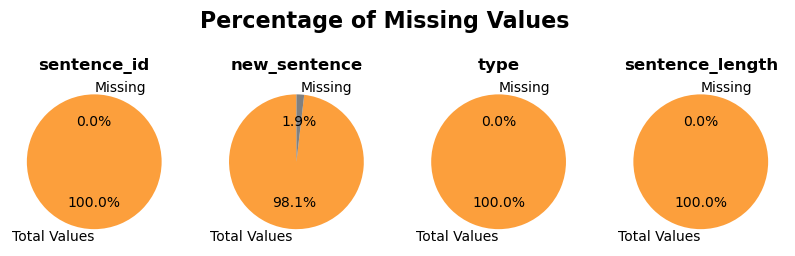

In [ ]:
# Define function to create pie chart for all columns
def add_pie_chart(ax, train_raw, column):
    total_values = train_raw[column].count()
    missing_values = train_raw[column].isnull().sum()
    total_cells = len(train_raw[column])

    labels = ['Total Values', 'Missing']
    sizes = [total_values, missing_values]
    colors = ['#fc9f3c', 'grey']

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(column, fontsize=12, fontweight='bold')

# Create figure and axes
fig, axes = plt.subplots(1, len(train_raw.columns), figsize=(10, 5))

# Add pie chart for each column
for ax, column in zip(axes, train_raw.columns):
    add_pie_chart(ax, train_raw, column)

# Show chart
plt.suptitle('Percentage of Missing Values', y=0.8, size=16, weight='bold')
plt.show()

**Insight**
* In the sentence_id column, the `most frequently occurring value is HONREQ4583`, appearing 2 times.
* In the `new_sentence column`, the most frequently occurring sentence is "this is a dummy block of text And this is representative of example sentences," appearing 852 times, and this column `has 1113 missing values`.
* In the type column, `there are 6 categories`, with the `most frequently occurring category being Responsibility`, appearing 15,561 times.

**Action**
Based on the visualization above, the column with missing values is new_sentence, with 1.85% missing. Since the amount of missing values is less than 20%, they will be removed.


In [ ]:
# Delete NA in 'new_sentence' column
train_raw = train_raw.dropna(subset=['new_sentence'])

In [ ]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59002 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentence_id      59002 non-null  object
 1   new_sentence     59002 non-null  object
 2   type             59002 non-null  object
 3   sentence_length  59002 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## Univariate Analysis

### Proportion of Each Category

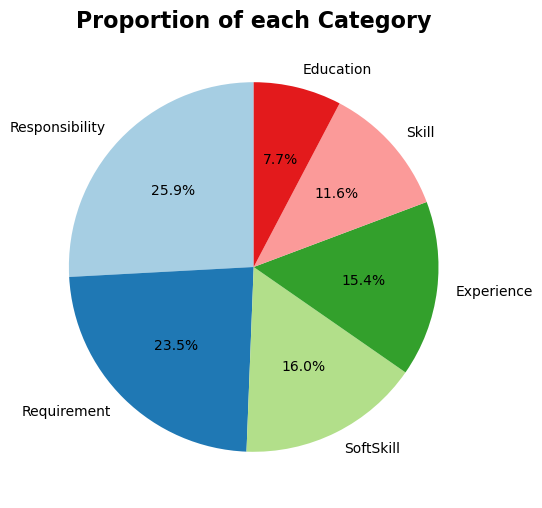

In [ ]:
# Calculate frequency in column 'Type'
type_counts = train_raw['type'].value_counts()

# Define sizes, labels, and colors
sizes = type_counts.values
labels = type_counts.index
colors = plt.cm.Paired.colors

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax.set_title('Proportion of each Category', fontsize=16, fontweight='bold')

# Menampilkan plot
plt.show()

Based on the results, the most frequently occurring category is Responsibility, accounting for 25.9%. The categories "Skill," "Education," and "Experience" have smaller proportions compared to the top three categories. This may indicate that these aspects are considered supplementary or not heavily emphasized in the dataset.


### Distribution of Sentence Length

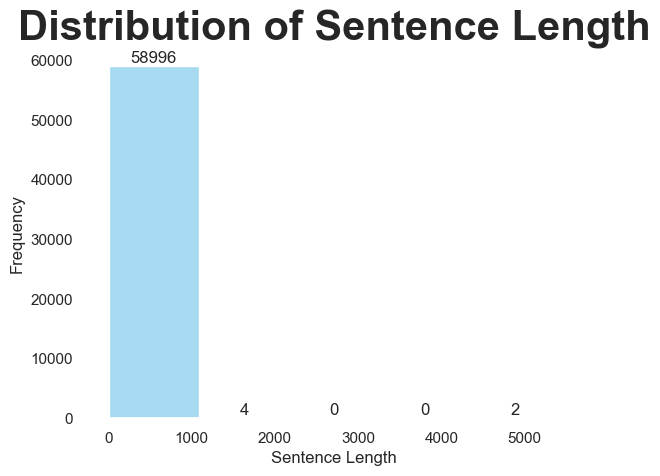

In [ ]:
# Define colors for the bars based on sentence length
cols = ['#fc9f3c' if x == 11 else 'grey' for x in train_raw['sentence_length']]

# Set the theme for the seaborn plot
sns.set_theme(style='darkgrid')

# Create a histogram with 'sentence_length' on the x-axis
ax = sns.histplot(data=train_raw, x='sentence_length', bins=5, color='skyblue', kde=False)

# Set the title of the plot
plt.title('Distribution of Sentence Length', size=30, weight='bold')

# Set the background color of the plot
ax.patch.set_facecolor('white')

# Set the labels for the x and y axes
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

# Set the rotation and font for the x and y ticks
plt.xticks(rotation=0)
plt.yticks()

# Add labels to the bars
for container in ax.containers:
  ax.bar_label(container)

# Show the plot
plt.show()

# Display the plot
plt.show()

Most sentences have a relatively short length, falling within the lowest sentence length range, which is below 1000
characters. This indicates that the text in the dataset tends to consist of short and concise sentences.

### Imbalance Class

C:\Users\user\AppData\Local\Temp\ipykernel_20348\1293226513.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=labels, x=sizes, palette=colors)


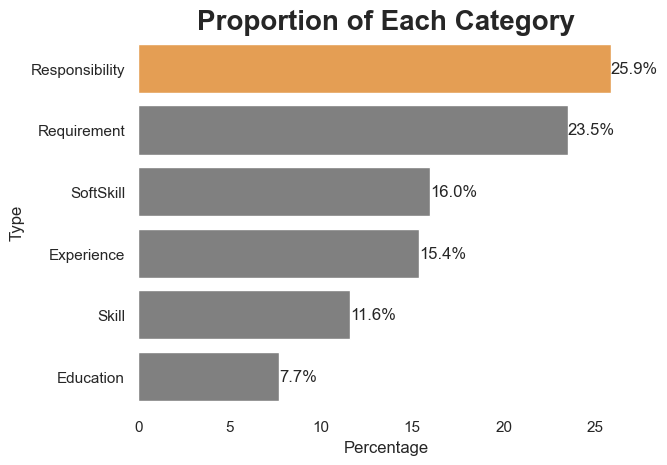

In [ ]:
# Calculate frequency in column 'type'
type_counts = train_raw['type'].value_counts()

# Calculate percentages
type_percentages = (type_counts / type_counts.sum()) * 100

# Define sizes, labels, and colors
sizes = type_percentages.values
labels = type_percentages.index
colors = ['#fc9f3c' if x == 'Responsibility' else 'grey' for x in labels]

# Set the theme for the seaborn plot
sns.set_theme(style='darkgrid')

# Create a horizontal bar plot with 'type' on the y-axis and count on the x-axis
ax = sns.barplot(y=labels, x=sizes, palette=colors)

# Set the title of the plot
plt.title('Proportion of Each Category', size=20, weight='bold')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Set the background color of the plot
ax.patch.set_facecolor('white')

# Set the labels for the x and y axes
plt.xlabel('Percentage')
plt.ylabel('Type')

# Set the rotation and font for the x and y ticks
plt.xticks(rotation=0)
plt.yticks()

# Display the plot
plt.show()

Based on the visualization results,
there is an imbalance in the classes,
although it is not extreme. The class
distribution in the target variable
shows a slight imbalance, with the
majority class accounting for
approximately 25.89% of the total
data, while the minority class
accounts for 7.71%.


### Keyword Frequency

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# setup stopword
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Fungsi untuk membersihkan dan tokenisasi teks
def clean_text(text, custom_stopwords=None):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Tokenisasi kata
    words = word_tokenize(text)
    # Menghapus stopwords
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    words_cleaned = [word for word in words if word.isalpha() and word not in stop_words]
    return words_cleaned

Analysis for category: Responsibility


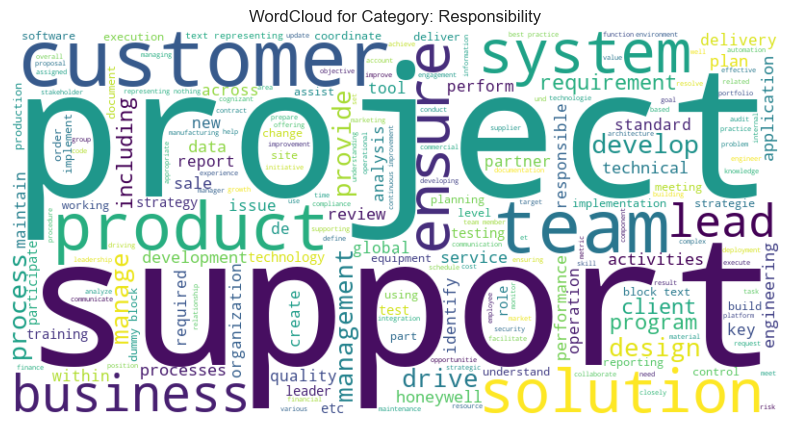

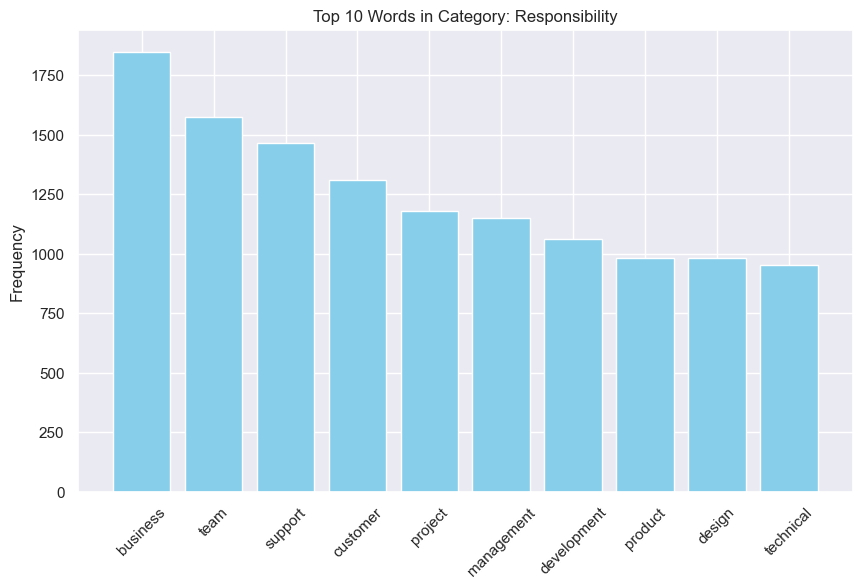

Analysis for category: Requirement


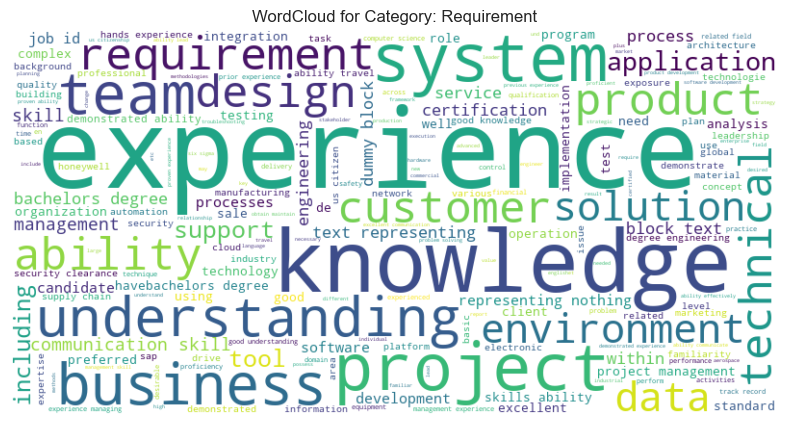

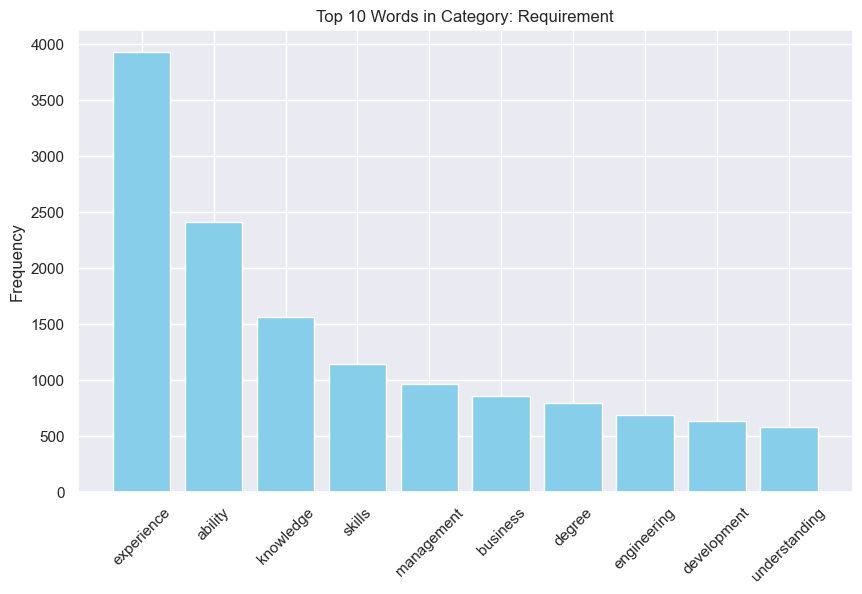

Analysis for category: Skill


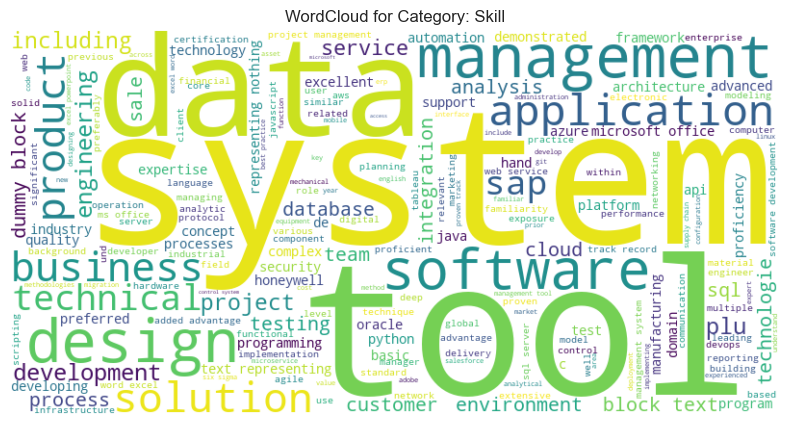

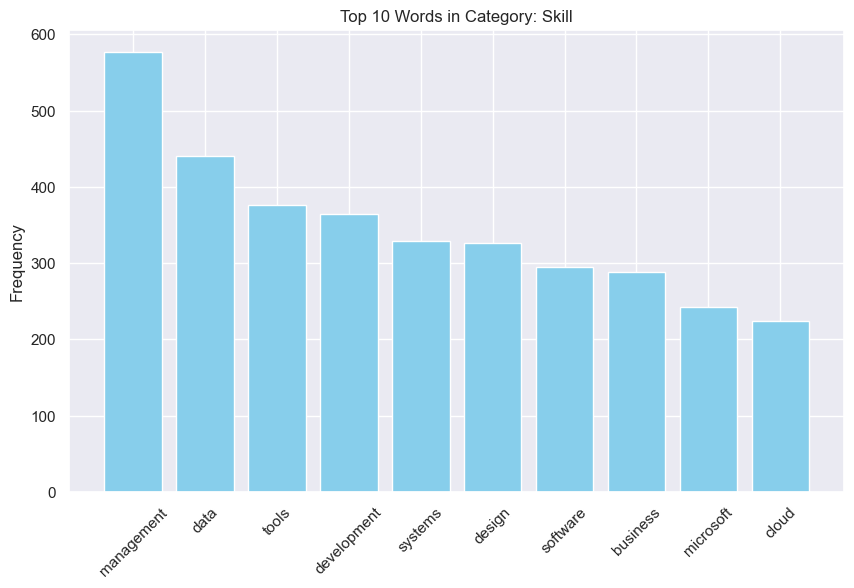

Analysis for category: SoftSkill


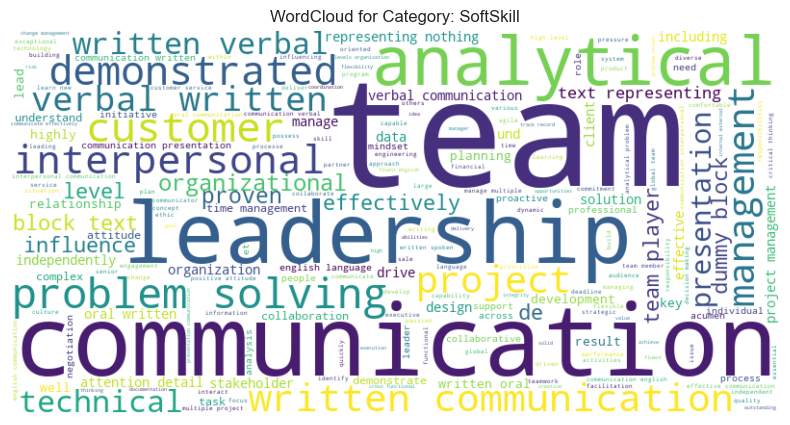

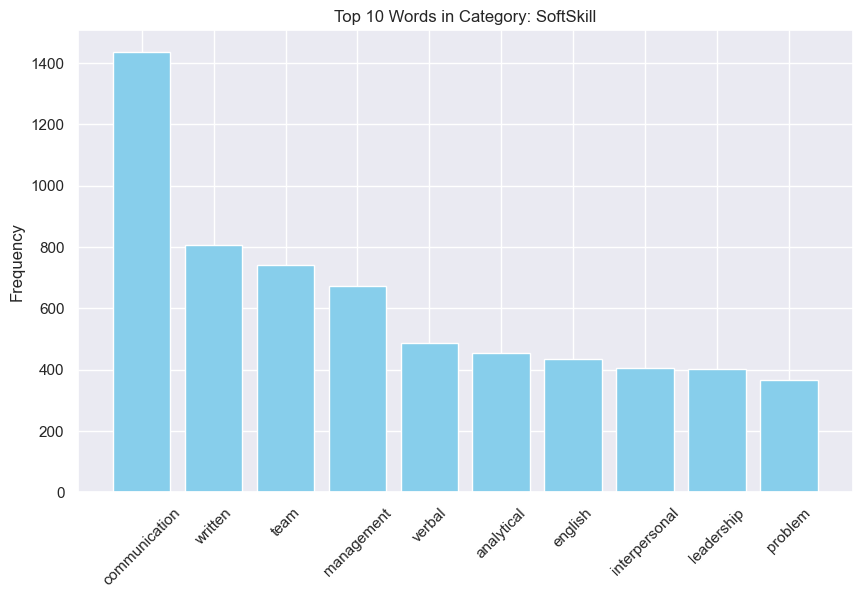

Analysis for category: Education


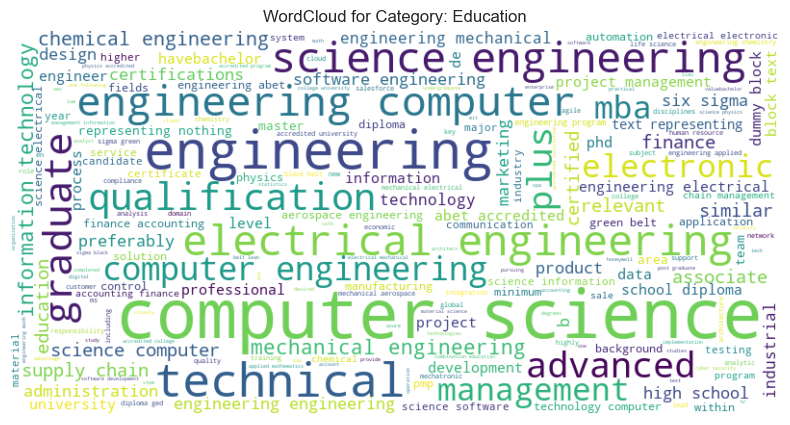

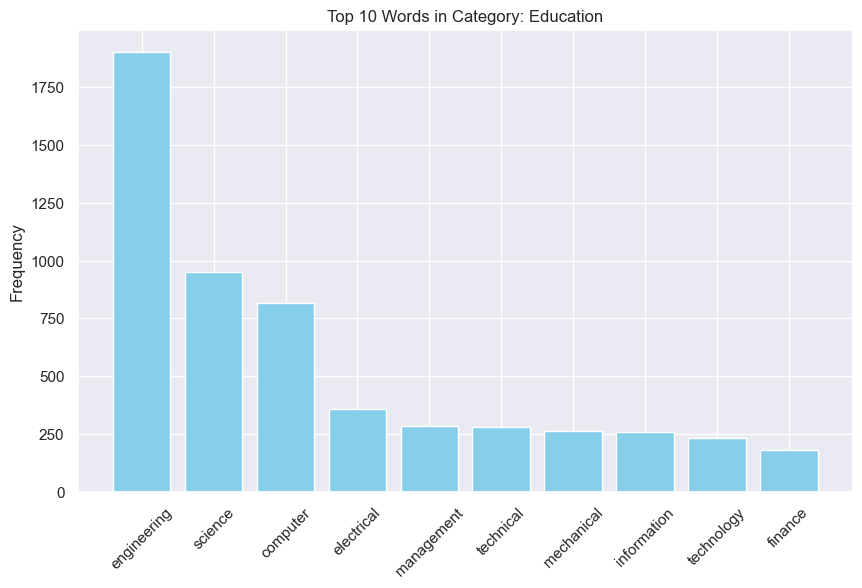

Analysis for category: Experience


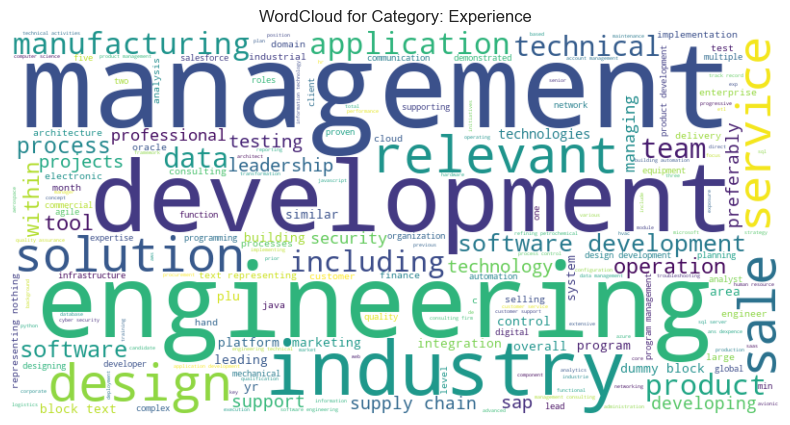

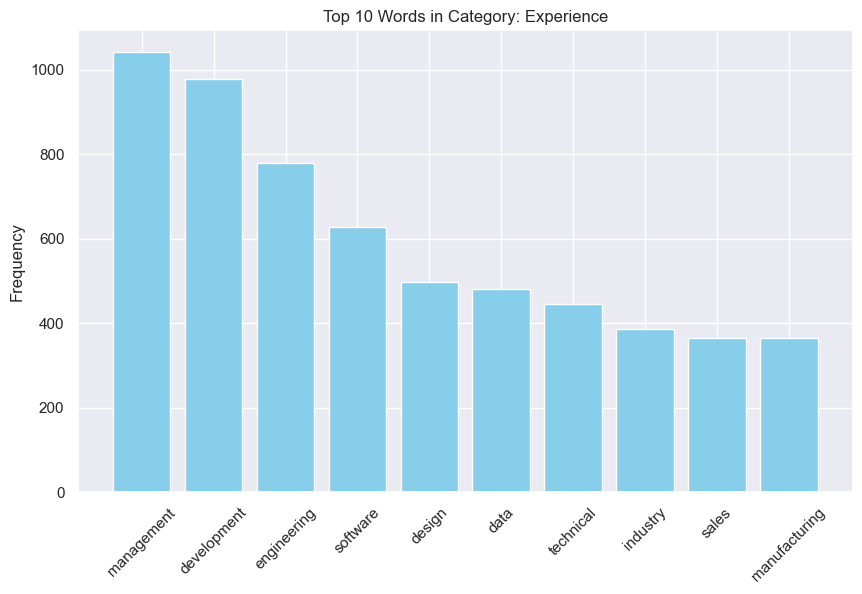

In [ ]:
# Define function to analyze category
def analyze_category(train_raw, category, custom_stopwords=None):
    filtered_text = ' '.join(train_raw[train_raw['type'] == category]['new_sentence'].dropna())
    cleaned_words = clean_text(filtered_text, custom_stopwords=custom_stopwords)

    if not cleaned_words:
        print(f"No words left after cleaning for category: {category}")
        return

    # Create WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Category: {category}")
    plt.show()

    # Create Histogram
    word_counts = Counter(cleaned_words)
    most_common_words = word_counts.most_common(10)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f"Top 10 Words in Category: {category}")
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
custom_stopwords = {
    'Responsibility': ['work'],
    'Requirement': ['must', 'work', 'strong', 'required', 'able', 'working'],
    'Skill': ['understanding', 'working', 'strong', 'experience', 'knowledge', 'skills', 'ability', 'good', 'using', 'etc', 'requirements'],
    'SoftSkill': ['skills', 'ability', 'strong', 'work', 'good', 'excellent', 'experience', 'business', 'environment'],
    'Education': ['field', 'degree', 'bachelors', 'related', 'experience', 'equivalent', 'certification', 'preferred', 'masters', 'bachelor', 'systems', 'discipline'],
    'Experience': ['minimum', 'working', 'least', 'experience', 'years', 'project', 'role', 'year']
}

for category, stopwords_to_add in custom_stopwords.items():
    print(f"Analysis for category: {category}")
    analyze_category(train_raw, category, custom_stopwords=stopwords_to_add)


**Key Finding**

1. In the Responsibility category, the frequently occurring words are team support, customer, management, development, product, design, technical, ensure, and process. From these keywords, it can be concluded that this category highly emphasizes interaction patterns, result orientation, and management aspects.
2. In the Requirement category, the frequently occurring words are management, engineering, development, technical, data, team, communication, design, security, and travel. From these keywords, it can be concluded that this category highly emphasizes technical qualifications and specific skills
3. In the Education category, the most frequently sought educational backgrounds are engineering, science, and computer.
4. In the Experience category, the frequently occurring words are management, engineering, development, software, design, data, technical, industry, sales, and manufacturing. From these keywords, it can be concluded that this category highly emphasizes experience in the STEM fields
5. In the Skill category, the frequently occurring words are management, data, tools, development, design, software, microsoft, cloud, technical, and sap. From these keywords, it can be concluded that this category highly emphasizes technical and analytical skills.
6. In the Softskill category, the frequently occurring words are communication, written, team, management, verbal, analytical, english, interpersonal, leadership, and problem. From these keywords, it can be concluded that this category highly emphasizes communication, leadership, and interpersonal skills

## Multivariate Analysis

### N-Gram Analysis

#### 2-Gram Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# N-gram Analysis (2-gram Example)
def generate_ngrams(texts, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(texts.dropna())
    ngram_freq = ngrams.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()
    ngram_df = pd.DataFrame({'Ngram': ngram_names, 'Frequency': ngram_freq}).sort_values(by='Frequency', ascending=False)
    return ngram_df

bigram = generate_ngrams(train_raw['new_sentence'], n=2)

# Display top 10 bigrams
print("\nTop 10 Bigrams:\n", bigram.head(10))


Top 10 Bigrams:
                        Ngram  Frequency
197549      years experience       3873
16918       bachelors degree       1588
30829   communication skills       1138
114176         minimum years       1084
19354             block text        852
181456     text representing        852
55049            dummy block        852
68733     experience working        820
140877    project management        816
94                  10 years        782


C:\Users\user\AppData\Local\Temp\ipykernel_20348\2769606385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=bigram['Ngram'][:10], x=bigram['Frequency'][:10], palette='viridis')


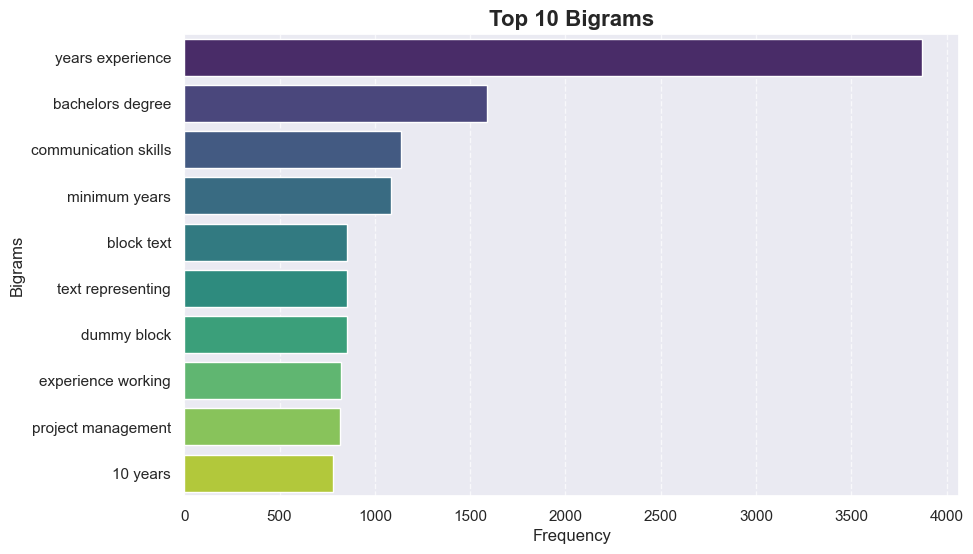

In [ ]:
# Vertical Plot for top 10 bigrams
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=bigram['Ngram'][:10], x=bigram['Frequency'][:10], palette='viridis')
plt.title('Top 10 Bigrams', size=16, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### 3-Gram Analysis

In [ ]:
# N-gram Analysis (3-gram Example)
def generate_ngrams(texts, n=3):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(texts.dropna())
    ngram_freq = ngrams.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()
    ngram_df = pd.DataFrame({'Ngram': ngram_names, 'Frequency': ngram_freq}).sort_values(by='Frequency', ascending=False)
    return ngram_df

trigram = generate_ngrams(train_raw['new_sentence'], n=3)

# Display top 10 trigrams
print("\nTop 10 Trigrams:\n", trigram.head(10))


Top 10 Trigrams:
                                  Ngram  Frequency
26814          block text representing        852
79034                 dummy block text        852
166728        minimum years experience        531
160                10 years experience        360
194911          problem solving skills        300
62558          degree computer science        279
23565     bachelors degree engineering        272
286148        years experience working        194
283767    written communication skills        191
93312   excellent communication skills        180


C:\Users\user\AppData\Local\Temp\ipykernel_20348\764760203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=trigram['Ngram'][:10], x=trigram['Frequency'][:10], palette='viridis')


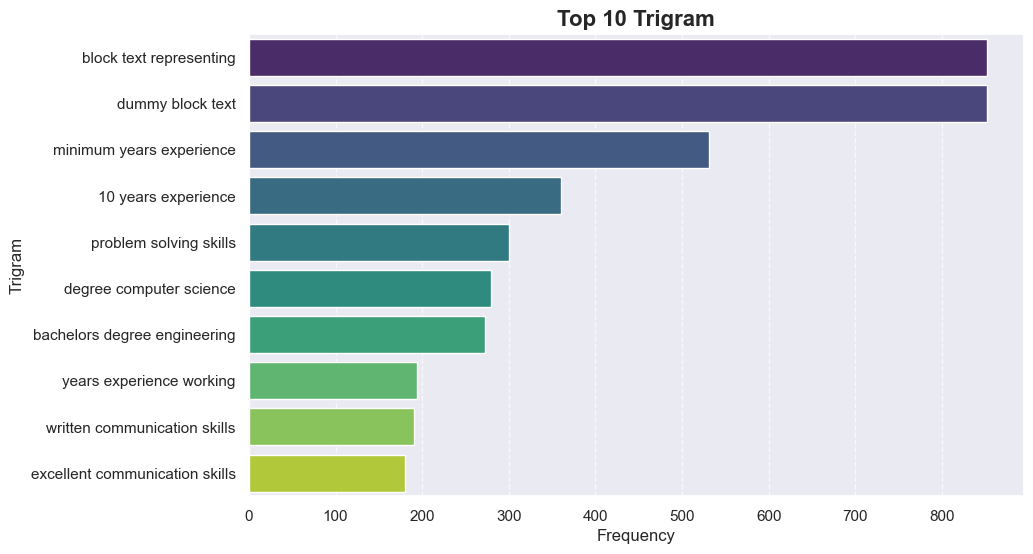

In [ ]:
# Vertical Plot for top 10 trigram
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=trigram['Ngram'][:10], x=trigram['Frequency'][:10], palette='viridis')
plt.title('Top 10 Trigram', size=16, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Business Insight

**Business Insight**

1. Responsibility Dominance: The Responsibility category is the most frequently occurring, accounting for 25.9% of the data. This indicates a strong emphasis on roles and tasks related to team interaction, customer
support, and management.
2. Technical Qualifications: The Requirement category highlights the importance of technical qualifications
and specific skills, with frequent keywords like management, engineering, development, and technical.
3. STEM Focus: The Experience category shows a significant focus on experience in STEM fields, with common
words including management, engineering, development, software, and design.
4. Educational Background: In the Education category, the most sought-after educational backgrounds are in
engineering, science, and computer fields.
5. Communication and Interpersonal Skills: The Softskill category highlights the importance of
communication, leadership, and interpersonal skills, with common words like communication, written, team,
management, and verbal.

**Business Recommendation**
1. Enhance Training Programs: Develop training programs focused on improving technical qualifications and
specific skills, especially in the areas highlighted in the Requirement and Skill categories.
2. Promote STEM Education: Encourage and support educational programs in STEM fields to align with the
demand for engineering, science, and computer backgrounds.
3. Focus on Soft Skills Development: Implement initiatives to enhance communication, leadership, and
interpersonal skills, as these are crucial in the Softskill category.
4. Address Class Imbalance: Consider techniques to address the slight class imbalance, such as data
augmentation or resampling methods, to ensure a more balanced dataset.
5. Tailor Recruitment Strategies: Adjust recruitment strategies to prioritize candidates with experience in
STEM fields and strong technical and analytical skills.


# Stage 2

## Text Normalization

In [ ]:
train_cl = train_raw.copy()

### Lowercase

In [ ]:
train_cl['new_sentence'] = train_cl['new_sentence'].str.lower()
train_cl['type'] = train_cl['type'].str.lower()

### Remove Punctuation

In [ ]:
# Check all punctuation

import string
from collections import Counter

# Combine all sentences to check punctuation usage
all_text = ' '.join(train_cl['new_sentence'].dropna())

# Count all characters that are punctuation
punctuation_counts = Counter(char for char in all_text if char in string.punctuation)

# Display the punctuation usage frequency
punctuation_counts.most_common()

[('.', 60791),
 (',', 42131),
 ('-', 10846),
 ('/', 9982),
 ('(', 6085),
 (')', 6075),
 ('+', 4906),
 ('&', 3241),
 (':', 2038),
 (';', 1200),
 (']', 395),
 ('?', 374),
 ('%', 365),
 ('#', 362),
 ('*', 308),
 ('_', 221),
 ('$', 68),
 ('[', 63),
 ('!', 43),
 ('~', 39),
 ('>', 35),
 ('<', 9),
 ('|', 8),
 ('`', 5),
 ('@', 5),
 ('=', 5),
 ('}', 2),
 ('{', 1)]

In [ ]:
# Delete . , : ;

import re

# function to delete certain punctuation
def remove_specific_punctuation(text):
    if isinstance(text, str):
        text = re.sub(r'[.,:;]', '', text)
    return text

# Delete from column 'new_sentence'
train_cl['cleaned_sentence'] = train_cl['new_sentence'].apply(remove_specific_punctuation)

# Display a few rows of the cleaned data
train_cl[['new_sentence', 'cleaned_sentence']].head()

new_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                    cleaned_sentence  
0  Author and/or Review architecture/design and o...  
1  Should be able to develop custom dynamic shape...  
2  Experience in working crosslly with a  larger ...  
3  Previous business experience including but not...  
4          Delivering fast and right the first  time

In [ ]:
# Delete '-' in the beginning of sentence
def remove_hyphen_at_start(text):
    if isinstance(text, str):
        text = text.lstrip('-').strip()
    return text

# Delete '-' in the beginning of sentence in 'new_sentence'
train_cl['cleaned_sentence'] = train_cl['new_sentence'].apply(remove_hyphen_at_start)

In [ ]:
# Delete '_' if seen more than 1 time
def remove_multiple_underscores(text):
    if isinstance(text, str):
        # Replace '_' with space
        text = re.sub(r'_{2,}', ' ', text)
    return text

# Delete '_' if seen more than 1 time in column 'new_sentence'
train_cl['cleaned_sentence'] = train_cl['new_sentence'].apply(remove_multiple_underscores)

In [ ]:
# Replace '&' with 'and' in column 'new_sentence'
train_cl['cleaned_sentence'] = train_cl['new_sentence'].str.replace('&', 'and')

In [ ]:
# Remove '!' from column 'new_sentence'
train_cl['cleaned_sentence'] = train_cl['new_sentence'].str.replace('!', '')

In [ ]:
# Delete '#' at the end of the sentence
def remove_hash_at_end(text):
    if isinstance(text, str):
        text = re.sub(r'#$', '', text).strip()
    return text

# Delete '#' at the end of the sentence from column 'new_sentence'
train_cl['cleaned_sentence'] = train_cl['new_sentence'].apply(remove_hash_at_end)

In [ ]:
# Remove double space
def remove_double_spaces(text):
    if isinstance(text, str):
        text = re.sub(r'\s+', ' ', text).strip()
    return text

### Remove URL Links

In [ ]:
# Remove URL Link
def remove_urls(text):
    if isinstance(text, str):
        text = re.sub(r'http[s]?://\S+', '', text)
    return text

# Menghapus URL link dari kolom 'new_sentence'
train_cl['cleaned_sentence'] = train_cl['new_sentence'].apply(remove_urls)

In [ ]:
train_cl[(train_cl['sentence_id'] == 'UAESKL45452')]

sentence_id                                       new_sentence   type  \
41258  UAESKL45452  https://honeywell.csod.com/ux/ats/careersite/1...  Skill   

       sentence_length cleaned_sentence  
41258               84

In [ ]:
# Delete row with sentence_id 'UAESKL45452'
train_cl = train_cl[train_cl['sentence_id'] != 'UAESKL45452']

## Spell Checker

In [ ]:
!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker
import multiprocessing
from tqdm import tqdm

In [ ]:
# Initialization spell checker
spell = SpellChecker()

# Spelling in a batch
def correct_spelling_batch(sentences):
    corrected_sentences = []
    for sentence in tqdm(sentences, desc="Correcting Spelling"):
        corrected_sentence = []
        for word in sentence.split():
            if word in spell.unknown([word]):  # if there is unknown word
                candidates = spell.candidates(word)
                corrected_word = spell.correction(word) if candidates else word
            else:
                corrected_word = word
            corrected_sentence.append(corrected_word)
        corrected_sentences.append(' '.join(corrected_sentence))
    return corrected_sentences

# Processing to avoid timeout
def process_in_batches(df, column, batch_size=1000):
    df = df.dropna(subset=[column])  # Drop NaN
    num_batches = (len(df) // batch_size) + 1
    corrected_list = []

    for i in tqdm(range(num_batches), desc="Processing Batches"):
        batch = df[column].iloc[i * batch_size: (i + 1) * batch_size]
        corrected_list.extend(correct_spelling_batch(batch))

    return corrected_list

# Do the process
train_cl['corrected_sentence'] = process_in_batches(train_cl, 'cleaned_sentence')
train_cl.head()

Processing Batches: 100%|██████████| 60/60 [8:00:28<00:00, 480.47s/it]


sentence_id                                       new_sentence  \
0  GERRES15609  Author and/or Review architecture/design and o...   
1  PHERES15784  Should be able to develop custom dynamic shape...   
2  GERREQ10457  Experience in working crosslly with a  larger ...   
3  GERSKL27235  Previous business experience, including but no...   
4  HONSSK18415         Delivering fast and right the first  time.   

             type  sentence_length  \
0  Responsibility              173   
1  Responsibility              104   
2     Requirement              105   
3           Skill              150   
4       SoftSkill               42   

                                    cleaned_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                  corrected_sentence  
0  Author anchor Review architecture/design and o...  
1  Should be able to develop custom dynamic shape...  
2  Experience in working crossly with a larger En...  
3  Previous business experience including but not...  
4           Delivering fast and right the first time

In [ ]:
# Cek rows contain anchor in 'corrected_sentence'
rows_with_and_or = train_cl[train_cl['corrected_sentence'].str.contains('anchor', na=False)]
rows_with_and_or

sentence_id                                       new_sentence  \
0      GERRES15609  Author and/or Review architecture/design and o...   
25     INDEDU33016            MBA Degree in  Finance and/or Business.   
35     GEREXP21708  Qualifications  The qualified candidate will h...   
113      INDEXP377  3-5 years experience in business/finance analy...   
117    UAEREQ24482  Familiarity in  PLC/DCS and/or Programming / H...   
...            ...                                                ...   
59974  GEREXP35290  Experience in technically related field work i...   
60019  PHESKL24072    Experience with Python and/or  PHP development.   
60021  UAERES14965  Build a platform ie be seen by clients and int...   
60035   COGEDU1056  The ideal candidate for this position  would h...   
60102  INDRES51804  Work with HPS Account Managers and/or other sa...   

                 type  sentence_length  \
0      Responsibility              173   
25          Education               39   
35         Experience              219   
113        Experience              106   
117       Requirement               81   
...               ...              ...   
59974      Experience               80   
60019           Skill               47   
60021  Responsibility              169   
60035       Education              156   
60102  Responsibility              255   

                                        cleaned_sentence  \
0      Author and/or Review architecture/design and o...   
25               MBA Degree in  Finance and/or Business.   
35     Qualifications  The qualified candidate will h...   
113    3-5 years experience in business/finance analy...   
117    Familiarity in  PLC/DCS and/or Programming / H...   
...                                                  ...   
59974  Experience in technically related field work i...   
60019    Experience with Python and/or  PHP development.   
60021  Build a platform ie be seen by clients and int...   
60035  The ideal candidate for this position  would h...   
60102  Work with HPS Account Managers and/or other sa...   

                                      corrected_sentence  
0      Author anchor Review architecture/design and o...  
25                MBA Degree in Finance anchor Business.  
35     Qualifications The qualified candidate will ha...  
113    3-5 years experience in business/finance analy...  
117    Familiarity in PLC/DCS anchor Programming / Hu...  
...                                                  ...  
59974  Experience in technically related field work i...  
60019      Experience with Python anchor PHP development  
60021  Build a platform i be seen by clients and inte...  
60035  The ideal candidate for this position would ha...  
60102  Work with HPS Account Managers anchor other sa...  

[943 rows x 6 columns]

In [ ]:
train_cl['corrected_sentence'] = train_cl['corrected_sentence'].str.replace('anchor', 'and/or')
train_cl.head()

sentence_id                                       new_sentence  \
0  GERRES15609  Author and/or Review architecture/design and o...   
1  PHERES15784  Should be able to develop custom dynamic shape...   
2  GERREQ10457  Experience in working crosslly with a  larger ...   
3  GERSKL27235  Previous business experience, including but no...   
4  HONSSK18415         Delivering fast and right the first  time.   

             type  sentence_length  \
0  Responsibility              173   
1  Responsibility              104   
2     Requirement              105   
3           Skill              150   
4       SoftSkill               42   

                                    cleaned_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                  corrected_sentence  
0  Author and/or Review architecture/design and o...  
1  Should be able to develop custom dynamic shape...  
2  Experience in working crossly with a larger En...  
3  Previous business experience including but not...  
4           Delivering fast and right the first time

## Tokenization

In [ ]:
# Tokenization
def identify_tokens(row):
    review = row['corrected_sentence']
    tokens = word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

train_cl['token_words'] = train_cl.apply(identify_tokens, axis=1)
train_cl.head()

sentence_id                                       new_sentence  \
0  GERRES15609  Author and/or Review architecture/design and o...   
1  PHERES15784  Should be able to develop custom dynamic shape...   
2  GERREQ10457  Experience in working crosslly with a  larger ...   
3  GERSKL27235  Previous business experience, including but no...   
4  HONSSK18415         Delivering fast and right the first  time.   

             type  sentence_length  \
0  Responsibility              173   
1  Responsibility              104   
2     Requirement              105   
3           Skill              150   
4       SoftSkill               42   

                                    cleaned_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                  corrected_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crossly with a larger En...   
3  Previous business experience including but not...   
4           Delivering fast and right the first time   

                                         token_words  
0  [Author, Review, and, other, technical, docume...  
1  [Should, be, able, to, develop, custom, dynami...  
2  [Experience, in, working, crossly, with, a, la...  
3  [Previous, business, experience, including, bu...  
4   [Delivering, fast, and, right, the, first, time]

## Removing Stop Words

In [ ]:
# remove stop words
sw = set(stopwords.words('english'))

def remove_stops(row):
    my_list = row['token_words']
    stop_words = [w for w in my_list if not w in sw]
    return (stop_words)

train_cl['stop_words'] = train_cl.apply(remove_stops, axis=1)
train_cl.head()

sentence_id                                       new_sentence  \
0  GERRES15609  Author and/or Review architecture/design and o...   
1  PHERES15784  Should be able to develop custom dynamic shape...   
2  GERREQ10457  Experience in working crosslly with a  larger ...   
3  GERSKL27235  Previous business experience, including but no...   
4  HONSSK18415         Delivering fast and right the first  time.   

             type  sentence_length  \
0  Responsibility              173   
1  Responsibility              104   
2     Requirement              105   
3           Skill              150   
4       SoftSkill               42   

                                    cleaned_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                  corrected_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crossly with a larger En...   
3  Previous business experience including but not...   
4           Delivering fast and right the first time   

                                         token_words  \
0  [Author, Review, and, other, technical, docume...   
1  [Should, be, able, to, develop, custom, dynami...   
2  [Experience, in, working, crossly, with, a, la...   
3  [Previous, business, experience, including, bu...   
4   [Delivering, fast, and, right, the, first, time]   

                                          stop_words  
0  [Author, Review, technical, documents, ensurin...  
1  [Should, able, develop, custom, dynamic, shape...  
2  [Experience, working, crossly, larger, Enginee...  
3  [Previous, business, experience, including, li...  
4             [Delivering, fast, right, first, time]

## Feature Engineering

### Stemming and Lemmatization

In [ ]:
# stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list(row):
    my_list = row['stop_words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

train_cl['stemmed_words'] = train_cl.apply(stem_list, axis=1)
train_cl.head()

sentence_id                                       new_sentence  \
0  GERRES15609  Author and/or Review architecture/design and o...   
1  PHERES15784  Should be able to develop custom dynamic shape...   
2  GERREQ10457  Experience in working crosslly with a  larger ...   
3  GERSKL27235  Previous business experience, including but no...   
4  HONSSK18415         Delivering fast and right the first  time.   

             type  sentence_length  \
0  Responsibility              173   
1  Responsibility              104   
2     Requirement              105   
3           Skill              150   
4       SoftSkill               42   

                                    cleaned_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                  corrected_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crossly with a larger En...   
3  Previous business experience including but not...   
4           Delivering fast and right the first time   

                                         token_words  \
0  [Author, Review, and, other, technical, docume...   
1  [Should, be, able, to, develop, custom, dynami...   
2  [Experience, in, working, crossly, with, a, la...   
3  [Previous, business, experience, including, bu...   
4   [Delivering, fast, and, right, the, first, time]   

                                          stop_words  \
0  [Author, Review, technical, documents, ensurin...   
1  [Should, able, develop, custom, dynamic, shape...   
2  [Experience, working, crossly, larger, Enginee...   
3  [Previous, business, experience, including, li...   
4             [Delivering, fast, right, first, time]   

                                       stemmed_words  
0  [author, review, technic, document, ensur, hig...  
1  [should, abl, develop, custom, dynam, shape, o...  
2  [experi, work, crossli, larger, engin, organ, ...  
3  [previou, busi, experi, includ, limit, busi, m...  
4                  [deliv, fast, right, first, time]

In [ ]:
# lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lem_list(row):
    my_list = row['stop_words']
    lem_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lem_list)

train_cl['lemmatized_words'] = train_cl.apply(lem_list, axis=1)
train_cl.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


sentence_id                                       new_sentence  \
0  GERRES15609  Author and/or Review architecture/design and o...   
1  PHERES15784  Should be able to develop custom dynamic shape...   
2  GERREQ10457  Experience in working crosslly with a  larger ...   
3  GERSKL27235  Previous business experience, including but no...   
4  HONSSK18415         Delivering fast and right the first  time.   

             type  sentence_length  \
0  Responsibility              173   
1  Responsibility              104   
2     Requirement              105   
3           Skill              150   
4       SoftSkill               42   

                                    cleaned_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                  corrected_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crossly with a larger En...   
3  Previous business experience including but not...   
4           Delivering fast and right the first time   

                                         token_words  \
0  [Author, Review, and, other, technical, docume...   
1  [Should, be, able, to, develop, custom, dynami...   
2  [Experience, in, working, crossly, with, a, la...   
3  [Previous, business, experience, including, bu...   
4   [Delivering, fast, and, right, the, first, time]   

                                          stop_words  \
0  [Author, Review, technical, documents, ensurin...   
1  [Should, able, develop, custom, dynamic, shape...   
2  [Experience, working, crossly, larger, Enginee...   
3  [Previous, business, experience, including, li...   
4             [Delivering, fast, right, first, time]   

                                       stemmed_words  \
0  [author, review, technic, document, ensur, hig...   
1  [should, abl, develop, custom, dynam, shape, o...   
2  [experi, work, crossli, larger, engin, organ, ...   
3  [previou, busi, experi, includ, limit, busi, m...   
4                  [deliv, fast, right, first, time]   

                                    lemmatized_words  
0  [Author, Review, technical, document, ensuring...  
1  [Should, able, develop, custom, dynamic, shape...  
2  [Experience, working, crossly, larger, Enginee...  
3  [Previous, business, experience, including, li...  
4             [Delivering, fast, right, first, time]

### Add Word Count

In [ ]:
train_cl['word_count'] = train_cl['new_sentence'].apply(lambda x: len(str(x).split()))
train_cl

sentence_id                                       new_sentence  \
0      GERRES15609  Author and/or Review architecture/design and o...   
1      PHERES15784  Should be able to develop custom dynamic shape...   
2      GERREQ10457  Experience in working crosslly with a  larger ...   
3      GERSKL27235  Previous business experience, including but no...   
4      HONSSK18415         Delivering fast and right the first  time.   
...            ...                                                ...   
60110  UAERES18030  In this position, you will  utilize your progr...   
60111   GERRES3026  In addition, this individual will be responsib...   
60112   INDSSK5492                      Good problem  solving skills.   
60113  PHESSK15092                            Good Excel knowledge  .   
60114   HONEDU1643  Bachelors Degree in  Electrical Engineering, M...   

                 type  sentence_length  \
0      Responsibility              173   
1      Responsibility              104   
2         Requirement              105   
3               Skill              150   
4           SoftSkill               42   
...               ...              ...   
60110  Responsibility              147   
60111  Responsibility              370   
60112       SoftSkill               29   
60113       SoftSkill               23   
60114       Education               87   

                                        cleaned_sentence  \
0      Author and/or Review architecture/design and o...   
1      Should be able to develop custom dynamic shape...   
2      Experience in working crosslly with a  larger ...   
3      Previous business experience, including but no...   
4             Delivering fast and right the first  time.   
...                                                  ...   
60110  In this position, you will  utilize your progr...   
60111  In addition, this individual will be responsib...   
60112                      Good problem  solving skills.   
60113                            Good Excel knowledge  .   
60114  Bachelors Degree in  Electrical Engineering, M...   

                                      corrected_sentence  \
0      Author and/or Review architecture/design and o...   
1      Should be able to develop custom dynamic shape...   
2      Experience in working crossly with a larger En...   
3      Previous business experience including but not...   
4               Delivering fast and right the first time   
...                                                  ...   
60110  In this position you will utilize your program...   
60111  In addition this individual will be responsibl...   
60112                        Good problem solving skills   
60113                             Good Excel knowledge .   
60114  Bachelors Degree in Electrical Engineering, Me...   

                                             token_words  \
0      [Author, Review, and, other, technical, docume...   
1      [Should, be, able, to, develop, custom, dynami...   
2      [Experience, in, working, crossly, with, a, la...   
3      [Previous, business, experience, including, bu...   
4       [Delivering, fast, and, right, the, first, time]   
...                                                  ...   
60110  [In, this, position, you, will, utilize, your,...   
60111  [In, addition, this, individual, will, be, res...   
60112                   [Good, problem, solving, skills]   
60113                           [Good, Excel, knowledge]   
60114  [Bachelors, Degree, in, Electrical, Engineerin...   

                                              stop_words  \
0      [Author, Review, technical, documents, ensurin...   
1      [Should, able, develop, custom, dynamic, shape...   
2      [Experience, working, crossly, larger, Enginee...   
3      [Previous, business, experience, including, li...   
4                 [Delivering, fast, right, first, time]   
...                                                  ...   
60110  [In, position, utilize, program, ma

### Sentiment Score

In [ ]:
!pip install TextBlob

In [ ]:
# Add sentiment score (positive, negative, atau netral)
from textblob import TextBlob

train_cl['sentiment_score'] = train_cl['new_sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_cl.head()

sentence_id                                       new_sentence  \
0  GERRES15609  Author and/or Review architecture/design and o...   
1  PHERES15784  Should be able to develop custom dynamic shape...   
2  GERREQ10457  Experience in working crosslly with a  larger ...   
3  GERSKL27235  Previous business experience, including but no...   
4  HONSSK18415         Delivering fast and right the first  time.   

             type  sentence_length  \
0  Responsibility              173   
1  Responsibility              104   
2     Requirement              105   
3           Skill              150   
4       SoftSkill               42   

                                    cleaned_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                  corrected_sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crossly with a larger En...   
3  Previous business experience including but not...   
4           Delivering fast and right the first time   

                                         token_words  \
0  [Author, Review, and, other, technical, docume...   
1  [Should, be, able, to, develop, custom, dynami...   
2  [Experience, in, working, crossly, with, a, la...   
3  [Previous, business, experience, including, bu...   
4   [Delivering, fast, and, right, the, first, time]   

                                          stop_words  \
0  [Author, Review, technical, documents, ensurin...   
1  [Should, able, develop, custom, dynamic, shape...   
2  [Experience, working, crossly, larger, Enginee...   
3  [Previous, business, experience, including, li...   
4             [Delivering, fast, right, first, time]   

                                       stemmed_words  \
0  [author, review, technic, document, ensur, hig...   
1  [should, abl, develop, custom, dynam, shape, o...   
2  [experi, work, crossli, larger, engin, organ, ...   
3  [previou, busi, experi, includ, limit, busi, m...   
4                  [deliv, fast, right, first, time]   

                                    lemmatized_words  word_count  \
0  [Author, Review, technical, document, ensuring...          21   
1  [Should, able, develop, custom, dynamic, shape...          16   
2  [Experience, working, crossly, larger, Enginee...          14   
3  [Previous, business, experience, including, li...          17   
4             [Delivering, fast, right, first, time]           7   

   sentiment_score  
0         0.011667  
1         0.250000  
2         0.053333  
3        -0.065476  
4         0.245238

### Label Encoder

In [ ]:
# Label encodeing for column 'type
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_cl['label_type'] = label.fit_transform(train_cl['type'])

### Mutual Information

In [ ]:
train_mi = train_cl.copy()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Combine text columns into one column
texts = train_mi['new_sentence'] + ' ' + train_mi['corrected_sentence'] + ' ' + train_mi['token_words'].apply(lambda x: ' '.join(x)) + ' ' + train_mi['stop_words'].apply(lambda x: ' '.join(x)) + ' ' + train_mi['stemmed_words'].apply(lambda x: ' '.join(x)) + ' ' + train_mi['lemmatized_words'].apply(lambda x: ' '.join(x))
labels = train_mi['label_type']

# Convert text into TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Calculate Chi-Square score
chi2_scores, _ = chi2(X, labels)

# Filter from high score to low score
feature_names = vectorizer.get_feature_names_out()
important_features = sorted(zip(feature_names, chi2_scores), key=lambda x: x[1], reverse=True)

# Print important features
print("Top Feature Importance (Chi-Square):")
for word, score in important_features[:10]:
    print(f"{word}: {score:.4f}")

NameError: name 'train_mi' is not defined

# Stage 3

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, use the correct path to your file
final_path = '/content/drive/My Drive/Data Analyst/Rakamin Academy/FinPro/Dataset/final_data.csv'
final_data = pd.read_csv(final_path)

Mounted at /content/drive


In [ ]:
final_data = final_data.drop(columns=[col for col in final_data.columns if col not in ['label_type', 'corrected_sentence']])
final_data['corrected_sentence'] = final_data['corrected_sentence'].str.lower()
final_data.head()

corrected_sentence  label_type
0  author and/or review architecture/design and o...           3
1  should be able to develop custom dynamic shape...           3
2  experience in working crossly with a larger en...           2
3  previous business experience including but not...           4
4           delivering fast and right the first time           5

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
docs = list(final_data['corrected_sentence'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
X = docs
y = final_data['label_type']
print(X.shape, y.shape)

(59001, 20000) (59001,)


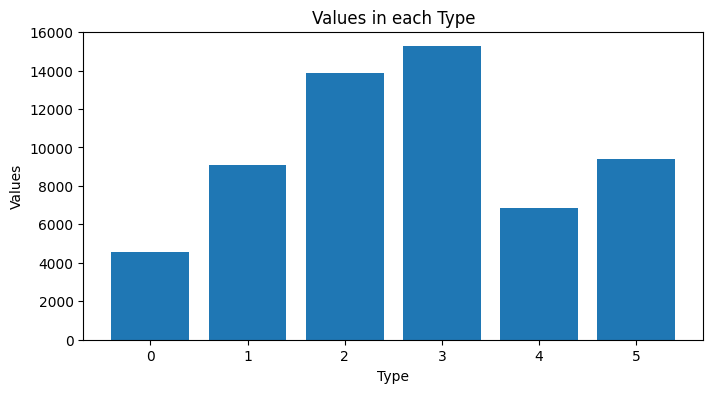

In [ ]:
value_counts = y.value_counts()

# Create chart
plt.figure(figsize=(8, 4))
plt.bar(value_counts.index, value_counts.tolist())
plt.title("Values in each Type")
plt.xlabel("Type")
plt.ylabel("Values")

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train-Test Split
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(47200, 20000) (47200,)
(11801, 20000) (11801,)


In [ ]:
# Save X_train, X_test, y_train, y_test into CSV
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Save to CSV File
X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

In [ ]:
# Define the path to save the files in Google Drive
save_path = '/content/drive/My Drive/Data Analyst/Rakamin Academy/FinPro/Dataset/'

# Save X_train, X_test, y_train, y_test into CSV
X_train_df.to_csv(save_path + 'X_train.csv', index=False)
X_test_df.to_csv(save_path + 'X_test.csv', index=False)
y_train_df.to_csv(save_path + 'y_train.csv', index=False)
y_test_df.to_csv(save_path + 'y_test.csv', index=False)


## Modelling Initizalize

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

## Naive Bayes Classifier

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 9.38 s, sys: 4.41 s, total: 13.8 s
Wall time: 13.9 s

Training Accuracy score: 0.47883474576271184
Testing Accuracy score: 0.3371748156935853


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['0', '1', '2', '3', '4', '5']))

              precision    recall  f1-score   support

           0       0.20      0.84      0.32       908
           1       0.33      0.33      0.33      1816
           2       0.35      0.13      0.19      2776
           3       0.72      0.29      0.41      3052
           4       0.28      0.17      0.22      1366
           5       0.37      0.60      0.46      1883

    accuracy                           0.34     11801
   macro avg       0.38      0.40      0.32     11801
weighted avg       0.43      0.34      0.32     11801



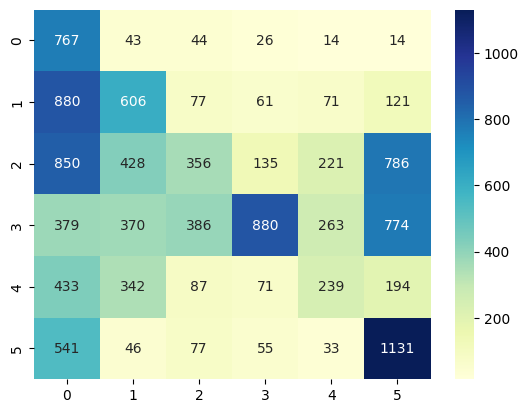

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

class_names = ['0', '1', '2', '3', '4', '5']

cm_matrix = pd.DataFrame(data=cm, columns=class_names, index=class_names)

# Plot heatmap confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

### Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB()
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 11 s, sys: 3.36 s, total: 14.3 s
Wall time: 4.48 s

Training Accuracy score: 0.7396822033898305
Testing Accuracy score: 0.6983306499449199


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['0', '1', '2', '3', '4', '5']))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       908
           1       0.78      0.85      0.81      1816
           2       0.56      0.59      0.57      2776
           3       0.73      0.91      0.81      3052
           4       0.68      0.32      0.44      1366
           5       0.73      0.64      0.68      1883

    accuracy                           0.70     11801
   macro avg       0.72      0.67      0.68     11801
weighted avg       0.70      0.70      0.69     11801



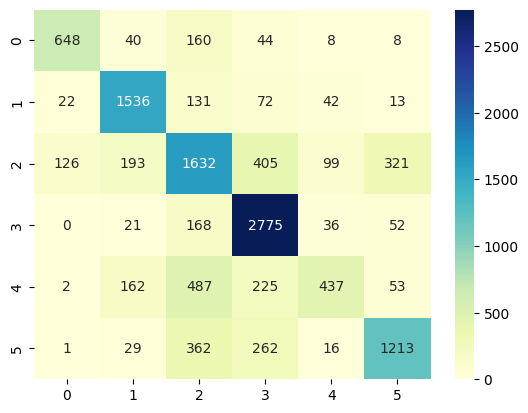

In [ ]:
target_names=['0', '1', '2', '3', '4', '5']
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=target_names, index=target_names)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 40min 15s, sys: 9min 8s, total: 49min 24s
Wall time: 12min 23s

Training Accuracy score: 0.8171610169491526
Testing Accuracy score: 0.7645962206592661


In [ ]:
import joblib

# Simpan model ke file
joblib.dump(lr, "logistic_regression_model.pkl")

print("Model berhasil disimpan!")

Model berhasil disimpan!


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['0', '1', '2', '3', '4', '5']))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       908
           1       0.97      0.91      0.94      1816
           2       0.66      0.67      0.66      2776
           3       0.80      0.93      0.86      3052
           4       0.64      0.54      0.58      1366
           5       0.72      0.67      0.70      1883

    accuracy                           0.76     11801
   macro avg       0.77      0.74      0.75     11801
weighted avg       0.76      0.76      0.76     11801



## Support Vector Machine

In [ ]:
svc =  LinearSVC(class_weight='balanced')
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 5min 47s, sys: 26 ms, total: 5min 47s
Wall time: 1min 29s

Training Accuracy score: 0.86875
Testing Accuracy score: 0.7556986696042708


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['0', '1', '2', '3', '4', '5']))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       908
           1       0.96      0.92      0.94      1816
           2       0.65      0.60      0.62      2776
           3       0.86      0.89      0.87      3052
           4       0.56      0.61      0.59      1366
           5       0.69      0.70      0.70      1883

    accuracy                           0.76     11801
   macro avg       0.75      0.75      0.75     11801
weighted avg       0.76      0.76      0.76     11801



## Decission Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 4min 1s, sys: 1.8 s, total: 4min 3s
Wall time: 4min 2s

Training Accuracy score: 0.9848093220338983
Testing Accuracy score: 0.6852809083975934


In [ ]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train, y_train)
eval_classification(dt)

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['0', '1', '2', '3', '4', '5']))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       908
           1       0.95      0.90      0.92      1816
           2       0.57      0.58      0.58      2776
           3       0.75      0.82      0.78      3052
           4       0.47      0.42      0.44      1366
           5       0.64      0.59      0.62      1883

    accuracy                           0.69     11801
   macro avg       0.67      0.67      0.67     11801
weighted avg       0.68      0.69      0.68     11801



## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=SEED)
%time gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

KeyboardInterrupt: 

AttributeError: 'NoneType' object has no attribute '_validate_X_predict'

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print(f"Accuracy (Test Set): {accuracy_score(y_test, y_pred):.2f}")
    print(f"Accuracy (Train Set): {accuracy_score(y_train, y_pred_train):.2f}")
    print(f"Precision (Test Set): {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall (Test Set): {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score (Test Set): {f1_score(y_test, y_pred, average='weighted'):.2f}")

    print(f"ROC AUC (Test Set): {roc_auc_score(y_test, y_pred_proba, multi_class='ovr'):.2f}")
    print(f"ROC AUC (Train Set): {roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr'):.2f}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
eval_classification(gb)

## Ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['saga'],
    'max_iter': [100, 200]
}

model = LogisticRegression()
random_search = RandomizedSearchCV(
    model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# Evaluation Result
print("Best Params:", random_search.best_params_)
print("Train Accuracy:", random_search.best_estimator_.score(X_train, y_train))
print("Test Accuracy:", random_search.best_estimator_.score(X_test, y_test))


Best Params: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 1}
Train Accuracy: 0.820614406779661
Test Accuracy: 0.7641725277518855


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Using best model after hyperparameter
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability positive class

# Evaluation classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluation ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       908
           1       0.97      0.90      0.94      1816
           2       0.66      0.67      0.66      2776
           3       0.80      0.93      0.86      3052
           4       0.64      0.55      0.59      1366
           5       0.72      0.66      0.69      1883

    accuracy                           0.76     11801
   macro avg       0.77      0.74      0.75     11801
weighted avg       0.76      0.76      0.76     11801



ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# After tuning process
best_lr = grid_search.best_estimator_

# Select path "Colab Notebooks"
model_path = '/content/drive/My Drive/Data Analyst/Rakamin Academy/FinPro/best_lr_model.pkl'

# Save Model
joblib.dump(best_lr, model_path)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## Predict

In [ ]:
import joblib

# Load model from driva .pkl
model = joblib.load("logistic_regression_model.pkl")

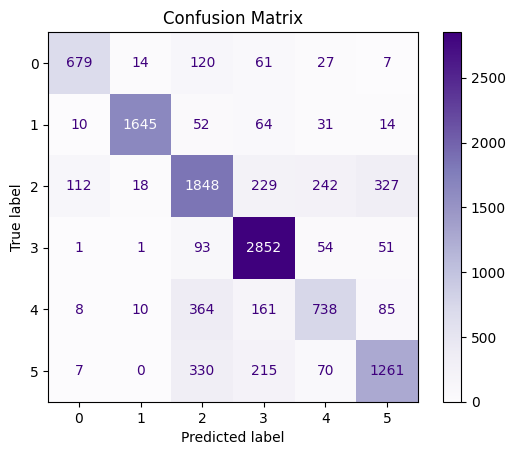

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# SHow
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")  # Gunakan warna agar lebih mudah dibaca
plt.title("Confusion Matrix")
plt.show()


## Error Analysis

In [ ]:
# Searching the wrong prediction
import pandas as pd

# Create Dataframe to compare actual and predicted result
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

# FIlter the data dan wrong prediction
misclassified = error_df[error_df['Actual'] != error_df['Predicted']]

# Show
print(misclassified.head(10))

       Actual  Predicted
37446       2          5
20082       2          0
47190       2          5
26832       4          3
10166       2          0
43237       2          3
28182       5          4
43770       5          3
33420       5          3
4123        3          4


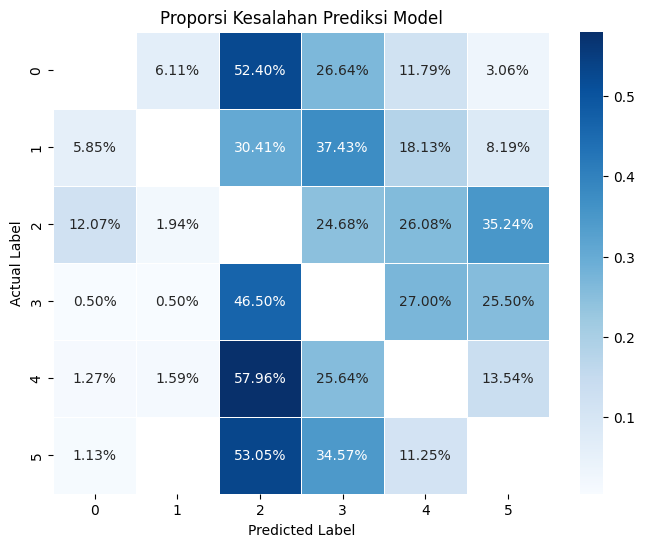

In [ ]:
# Hitung total kesalahan per kelas (berdasarkan label aktual)
misclassified_proportion = misclassified.groupby('Actual')['Predicted'].value_counts(normalize=True).unstack()

# Visualisasi dengan heatmap lebih informatif
plt.figure(figsize=(8,6))
sns.heatmap(misclassified_proportion, annot=True, cmap='Blues', fmt=".2%", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Proporsi Kesalahan Prediksi Model")
plt.show()

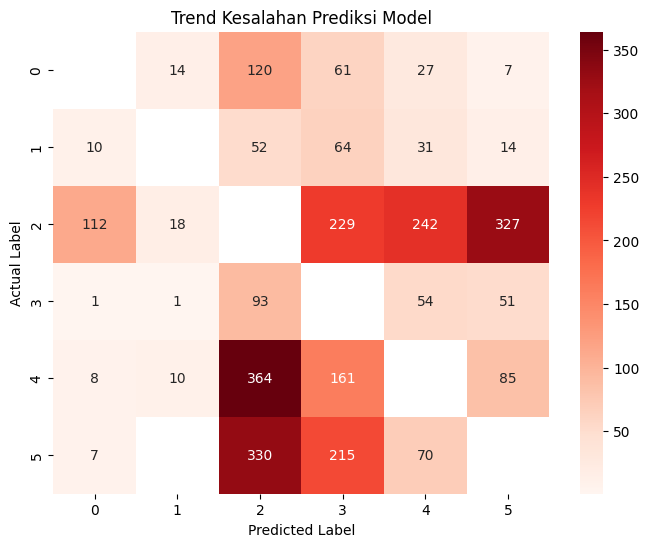

In [ ]:
# Identified the trend
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah kesalahan untuk masing-masing kelas
misclassified_counts = misclassified.groupby('Actual')['Predicted'].value_counts().unstack()

# Visualisasi kesalahan prediksi
plt.figure(figsize=(8,6))
sns.heatmap(misclassified_counts, annot=True, cmap='Reds', fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Trend Kesalahan Prediksi Model")
plt.show()

In [ ]:
# Confident Score
# Take proba prediction
y_proba_test = lr.predict_proba(X_test)

# Add proba to predict
misclassified = misclassified.reset_index(drop=True)
misclassified['Prob_Predicted'] = y_proba_test.max(axis=1)[misclassified.index]

# Lihat beberapa contoh data yang salah diprediksi
print(misclassified.head(10))


   Actual  Predicted  Prob_Predicted
0       2          5        0.967562
1       2          0        0.946358
2       2          5        0.954319
3       4          3        0.674320
4       2          0        0.535171
5       2          3        0.407203
6       5          4        0.803680
7       5          3        0.878509
8       5          3        0.530332
9       3          4        0.657698


In [ ]:
import pandas as pd

# Ambil probabilitas prediksi untuk kelas yang dipilih
misclassified = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_test})
misclassified = misclassified[misclassified["Actual"] != misclassified["Predicted"]]

# Ambil confidence score (max probability)
misclassified["Confidence"] = np.max(y_proba_test[misclassified.index], axis=1)

# Visualisasi confidence score dari kesalahan prediksi
plt.figure(figsize=(8,5))
sns.histplot(misclassified["Confidence"], bins=20, kde=True, color='red')
plt.xlabel("Confidence Score")
plt.ylabel("Jumlah Kesalahan")
plt.title("Distribusi Confidence Score pada Prediksi yang Salah")
plt.show()

In [ ]:
# Konversi X_test ke DataFrame dengan reset index
X_test_df = pd.DataFrame(X_test).reset_index(drop=True)
y_test_df = y_test.reset_index(drop=True)

# Pastikan indeks misclassified juga sesuai
misclassified = misclassified.reset_index(drop=True)

# Tambahkan teks berdasarkan indeks yang telah diperbaiki
misclassified['Text'] = X_test_df.loc[misclassified.index]

# Tampilkan contoh kesalahan prediksi
print(misclassified[['Text', 'Actual', 'Predicted']].head(10))

ValueError: Cannot set a DataFrame with multiple columns to the single column Text

# Stage 4